In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the datasets
train_data = pd.read_csv(r"E:\data\train.csv")
test_data = pd.read_csv(r"E:\data\test.csv")

In [3]:
train_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


in this data sets we have to predict that the loan will paid or not paid
step 1: we have to check the missing values in both train and test data sets
step 2: we have to check the duplicate values in both train and test data sets
step 3: we have to check the data types and non null counts in both train and test data sets
step 4: we have to check the statistical summary of both train and test data sets
step 5: we have to check the shape of both train and test data sets

-------------------------------------------------------------------------------------------------------------------------------------------------------------

annual_income
→ Tells how much money a person earns in a year.
Used to check whether they can repay the loan.

debt_to_income_ratio
→ Shows how much of their income is already used to pay other debts.
Higher value = more risk.

credit_score
→ A score that represents how good someone is at repaying loans.
Higher score = safer borrower.

loan_amount
→ The amount of money the person wants to borrow.

interest_rate
→ The percentage the borrower must pay extra.
Higher rate = higher risk borrower.

gender
→ Borrower’s gender (may be used in analysis or fairness checks).

marital_status
→ Shows if the person is single, married, divorced, etc.
Sometimes used to understand financial stability.

education_level
→ Highest education achieved.
Education often correlates with job stability and income.

employment_status
→ Shows whether the borrower is employed, self-employed, unemployed, etc.
Important for predicting repayment ability.

loan_purpose
→ Why the person is taking the loan (home, car, education, medical).
Some purposes are riskier than others.

grade_subgrade
→ A risk rating assigned by the lender (like A1, B2, C3).
Lower grade = higher risk.

loan_paid_back
→ Target column.
Shows whether the loan was fully repaid (1 = Yes, 0 = No).
Used for classification.

In [4]:
train_data.shape

(593994, 13)

In [5]:
train_data.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [6]:
test_data.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64

In [7]:
train_data.duplicated().sum()

np.int64(0)

In [8]:
test_data.duplicated().sum()

np.int64(0)

In [9]:
train_data.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [10]:
train_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


### EDA 


In [11]:
"""Performing the Exploratory Data Analysis (EDA) for better understanding of the data."""

'Performing the Exploratory Data Analysis (EDA) for better understanding of the data.'

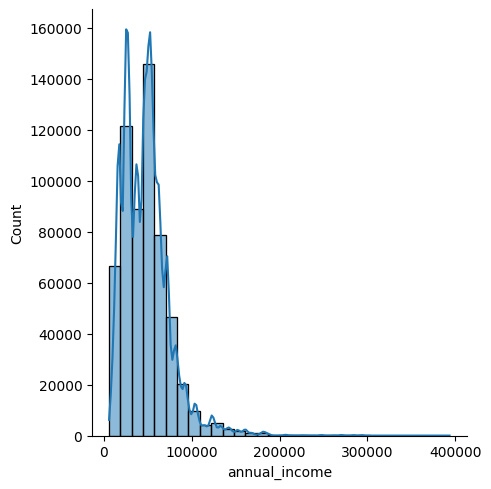

In [12]:
plt.Figure(figsize=(10,8))
sns.displot(train_data['annual_income'], kde=True, bins=30)

Observation  : in the anual_incomce the plot shows the right skewed distribution
most of the people have anual income undert the 200000 and few people have anual income above 200000


loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64


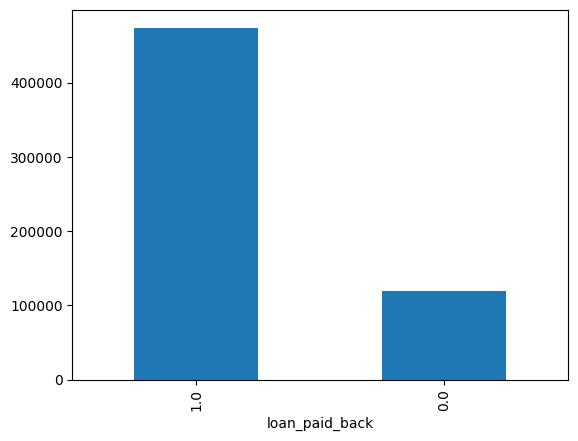

In [13]:
train_data['loan_paid_back'].value_counts().plot(kind='bar')
print(train_data['loan_paid_back'].value_counts())

Here is the data imbalance check of target column loan_paid_back:
# loan_paid_back value counts
1.  loan_paind_back = 1: 474494
2.  loan_paid_back = 0 : 119500
3. here i can see the paid back loan is more than the not paid back loan

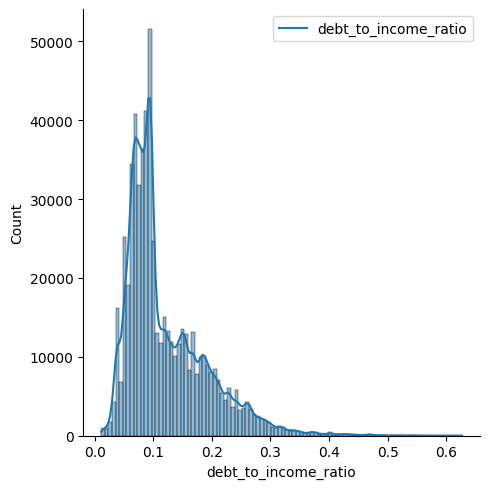

In [14]:
plt.Figure(figsize=(20,15))
sns.displot(train_data['debt_to_income_ratio'], kde=True, bins = 100)
plt.legend(['debt_to_income_ratio'])
plt.show()

1. for the debit to income ratio most of the people have the debt to income ratio under 50% and few people have the debt to income ratio above 50%
and the distribution is little bit of right skewed

C:\Users\DELL\AppData\Local\Temp\ipykernel_19144\2091904391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['credit_score'],color='r')


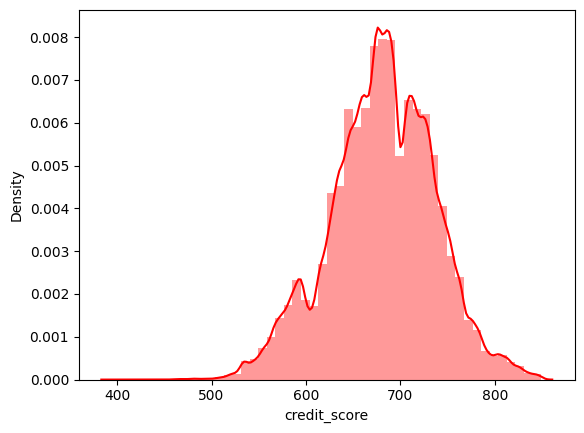

In [15]:
sns.distplot(train_data['credit_score'],color='r')
plt.show()

credit_score distiribution is nearly normal distribution most of the people have the credit score between 600 to 750


In [16]:
train_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


<Axes: xlabel='education_level'>

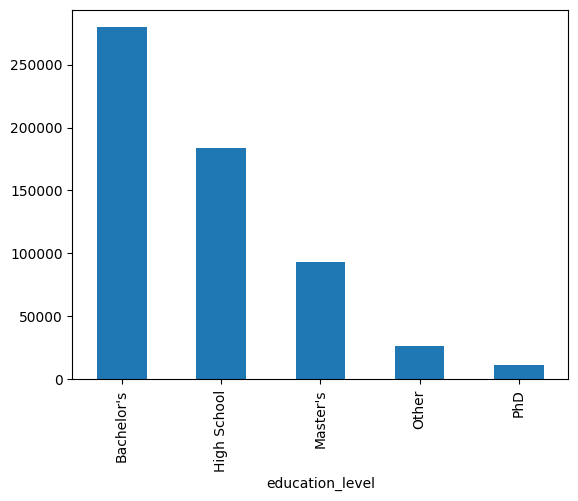

In [17]:
train_data['education_level'].value_counts().plot(kind='bar')

1. here in the education level most of the people have the graduate
2. most people done the bachelor's degree and very less are done the phd 

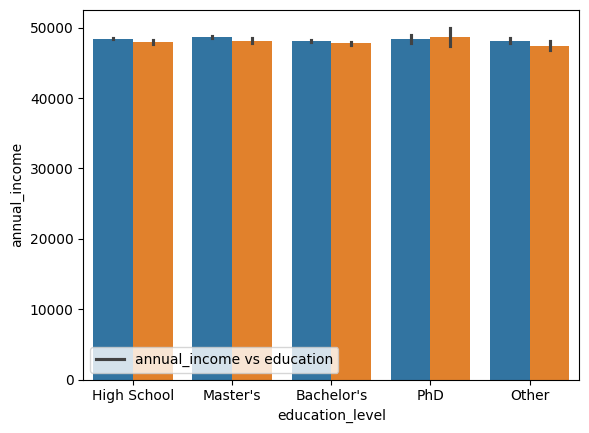

anual_income and the salary based on education level


In [18]:
sns.barplot(x = 'education_level', y ='annual_income', data = train_data,hue='loan_paid_back',hue_order=[1,0])
plt.legend(['annual_income vs education'])
plt.xlabel('education_level')
plt.ylabel('annual_income')
plt.show()
print('anual_income and the salary based on education level')


The annual income remains almost uniform across all education levels, with only a slight increase for PhD holders. Loan repayment status also shows minimal variation within each education group, indicating that education level does not significantly influence income or loan repayment in this dataset.

In [19]:
education_base_salery = train_data.groupby('education_level')['annual_income'].mean()
education_base_salery

education_level
Bachelor's     48008.557607
High School    48363.002379
Master's       48551.229708
Other          48021.384428
PhD            48464.697812
Name: annual_income, dtype: float64

after the grouping the people on the basis of eduactiona and anual income we can see that the average anual income look almost identical across all education levels with slight increase for phd holders

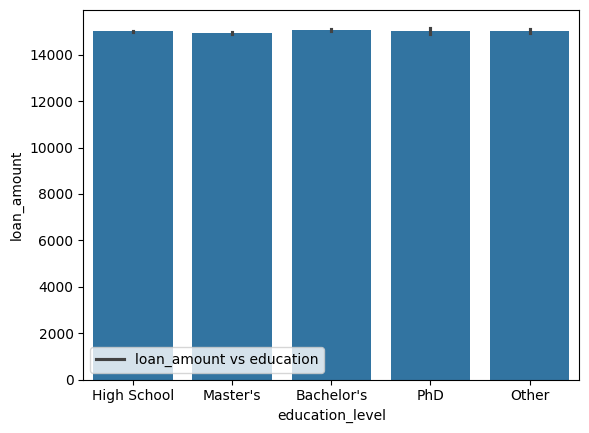

loan_amount on education level


In [20]:
sns.barplot(x = 'education_level', y ='loan_amount', data = train_data)
plt.legend(['loan_amount vs education'])
plt.xlabel('education_level')
plt.ylabel('loan_amount')
plt.show()
print('loan_amount on education level')


In [21]:
train_data['employment_status'].value_counts()

employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

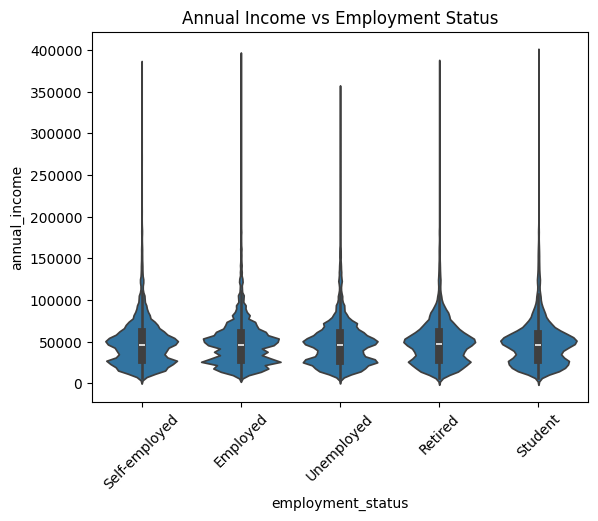

In [22]:
sns.violinplot(x='employment_status', y='annual_income', data=train_data)
plt.title("Annual Income vs Employment Status")
plt.xticks(rotation=45)
plt.show()


The violin plot shows that annual income distribution across employment status categories is fairly similar, with median incomes around 40K–50K for all groups. Employed and self-employed individuals exhibit the widest income range and the highest outliers, suggesting more variability. Students have the lowest and most concentrated income distribution. Retired individuals show moderate income levels with fewer extreme values.


In [23]:
train_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


<Axes: xlabel='loan_purpose'>

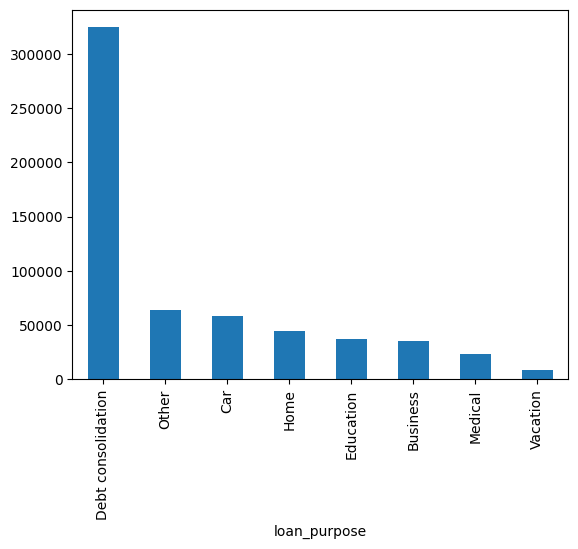

In [24]:
train_data['loan_purpose'].value_counts().plot(kind='bar')

in the loan purpose most of the people are taking the loan for debt consolidation and very less people are taking the loan for renewable energy

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Debt consolidation'),
  Text(2, 0, 'Home'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Vacation'),
  Text(5, 0, 'Car'),
  Text(6, 0, 'Medical'),
  Text(7, 0, 'Business')])

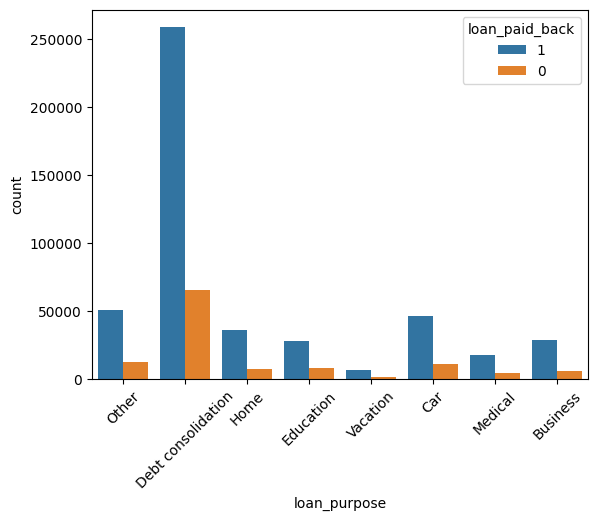

In [25]:
sns.countplot(x='loan_purpose', data=train_data,hue='loan_paid_back', hue_order=[1,0])
plt.xticks(rotation=45)
# rotatethe labels on x axis for better visibility

the most of the people who are taking the loan for debt consolidation are paid back the loan and very less people are not paid back the loan


<Axes: xlabel='loan_purpose'>

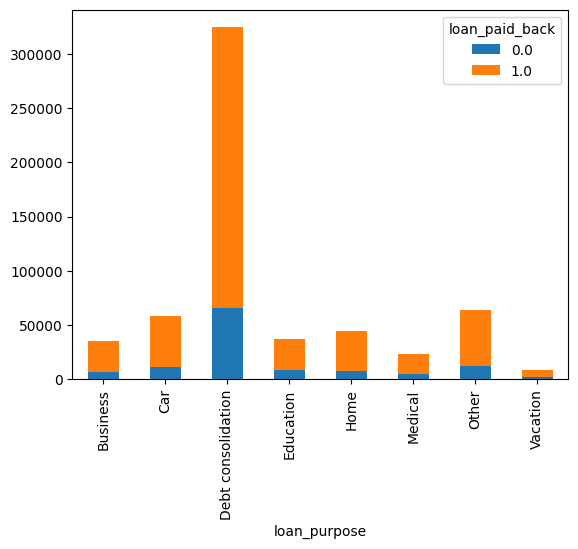

In [26]:
train_data.groupby(['loan_purpose','loan_paid_back']).size().unstack().plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Correlation Heatmap')

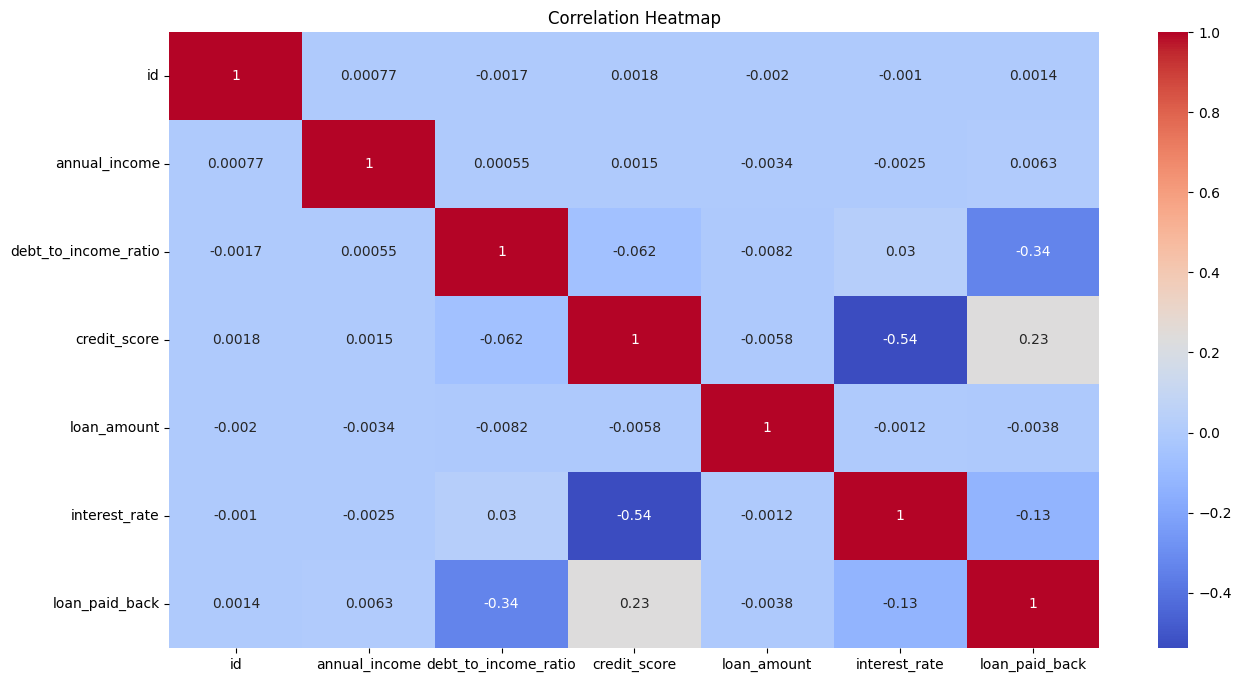

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

1. Most of the numerical features show very weak correlations with each other (values close to 0), meaning they don't have strong linear relationships.

2. Credit Score vs Interest Rate
There is a strong negative correlation (-0.54).
Interpretation: As a person’s credit score increases, the interest rate they receive tends to decrease — which matches real-world expectations.

3. Debt-to-Income Ratio vs Loan Paid Back
Shows a moderate negative correlation (-0.34).
Interpretation: Borrowers with a higher debt-to-income ratio are less likely to repay the loan.

4. Credit Score vs Loan Paid Back
Has a positive correlation (0.23).
Interpretation: Borrowers with higher credit scores are generally more reliable in paying back their loans.

5. Income Variables (annual_income, loan_amount)
These features have correlations very close to zero with the target, meaning income doesn't strongly influence loan repayment in this dataset.

6. ID Column
The ID field provides no analytical value, as expected. It shows 1 on its diagonal but near-zero with other variables.

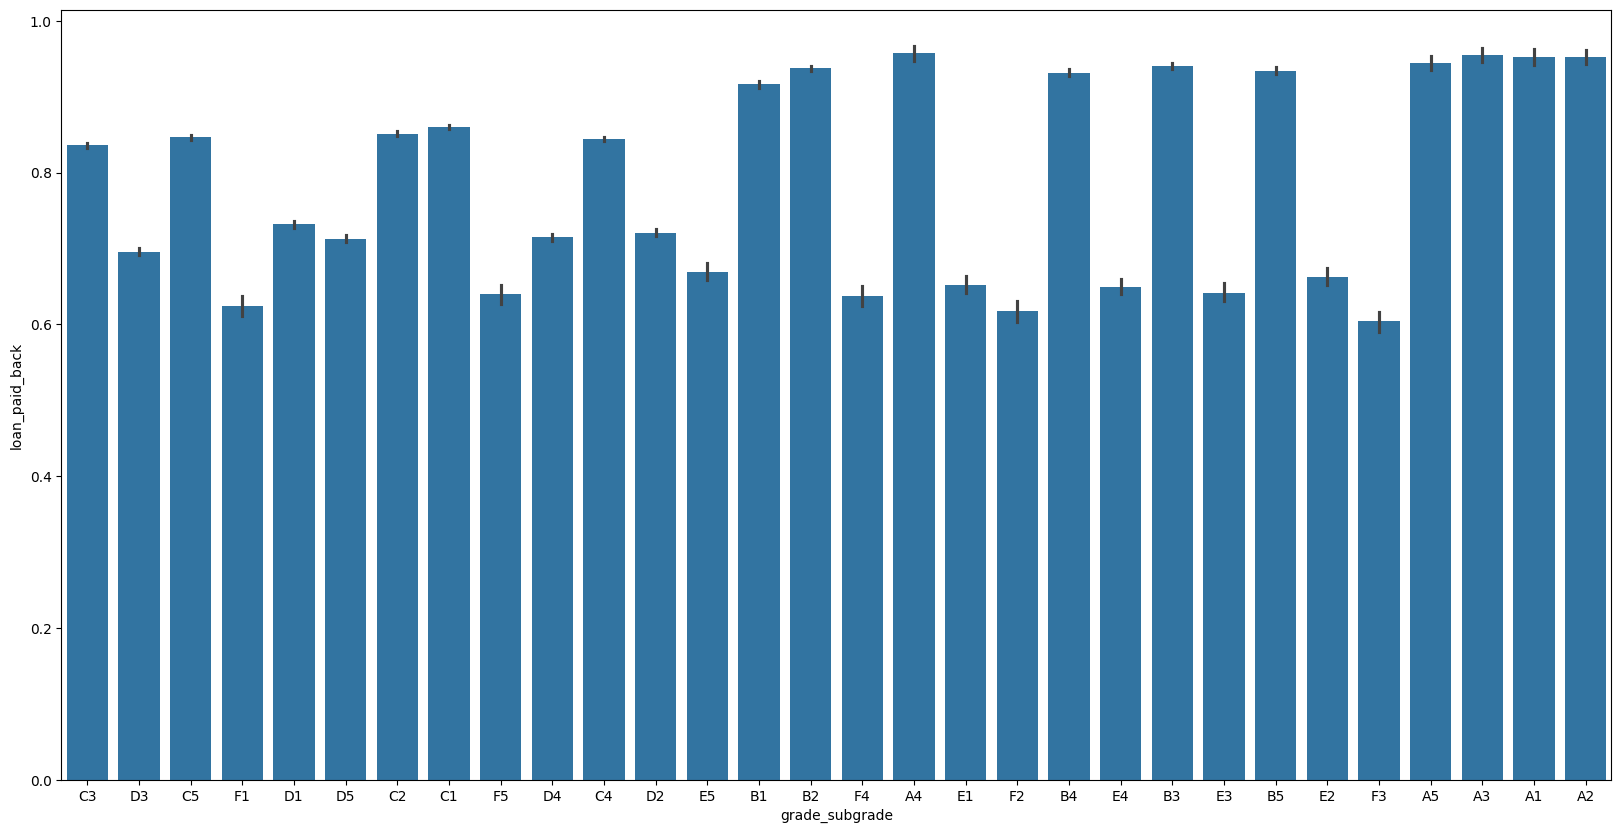

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='grade_subgrade', y='loan_paid_back', data=train_data)
plt.show()